### Q1. Implementing the Transportation Problem:
#### Scenario: Street with blocks numbered 1 to n. Walking from s to s+ 1takes 1 minute. Taking a magic Tram from s to 2s takes 2 minutes. How to travel from 1 to n in the least time

In [5]:
class TransportionProblem:
    def __init__(self,N):
            self.N = N
    # def one_Step():
    # def magic_Tramp():                
    def succAndCost(self):
        state=self.N
        actions=[int(state)]
        minutes=0
        while(state!=1):
            if(state==2):
                state=state-1
                minutes=minutes+1
                actions.append(int(state))
            elif(state%2>0):
                state=state-1
                actions.append(int(state))
                minutes=minutes+1
            else:
                state=state/2
                actions.append(int(state))
                minutes=minutes+2
        actions.reverse()
        for i in range(0,len(actions),1):
            if(actions[i]==1):
                actions[i]="Starting from "+str(actions[i])
            elif(actions[i]==2):
                actions[i]="Take one step to "+str(actions[i])    
            elif((actions[i]%2>0)):
                actions[i]="Take one step to "+str(actions[i])
            else:
               actions[i]="Take a magic tramp to "+str(actions[i])    
        result=(actions,minutes)      #stored in tuple                   
        return result        
#Class end       
                   
obj = TransportionProblem(18) #object
action,minutes=obj.succAndCost()  #unpacking tuple 
print(action)
print("Minutes taken = "+str(minutes))

['Starting from 1', 'Take one step to 2', 'Take a magic tramp to 4', 'Take a magic tramp to 8', 'Take one step to 9', 'Take a magic tramp to 18']
Minutes taken = 8


### Q2. Implement the A* search

route [(4, 4), (3, 3), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (6, 4), (7, 5), (6, 6)]
cost 10


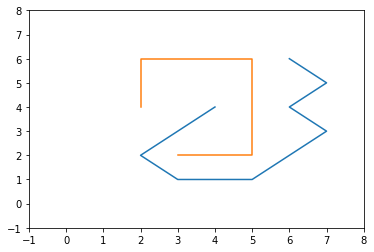

In [9]:
from __future__ import print_function
import matplotlib.pyplot as plt
 
class AStarGraph(object):
    #Define a class board like grid with two barriers
 
    def __init__(self):
        self.barriers = []
        self.barriers.append([(2,4),(2,5),(2,6),(3,6),(4,6),(5,6),(5,5),(5,4),(5,3),(5,2),(4,2),(3,2)])
 
    def heuristic(self, start, goal):
        #Use Chebyshev distance heuristic if we can move one square either
        #adjacent or diagonal
        D = 1
        D2 = 1
        dx = abs(start[0] - goal[0])
        dy = abs(start[1] - goal[1])
        return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
 
    def get_vertex_neighbours(self, pos):
        n = []
        #Moves allow link a chess king
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1),(1,1),(-1,1),(1,-1),(-1,-1)]:
            x2 = pos[0] + dx
            y2 = pos[1] + dy
            if x2 < 0 or x2 > 7 or y2 < 0 or y2 > 7:
                continue
            n.append((x2, y2))
        return n
 
    def move_cost(self, a, b):
        for barrier in self.barriers:
            if b in barrier:
                return 100 #Extremely high cost to enter barrier squares
        return 1 #Normal movement cost
 
def AStarSearch(start, end, graph):
 
    G = {} #Actual movement cost to each position from the start position
    F = {} #Estimated movement cost of start to end going via this position
 
    #Initialize starting values
    G[start] = 0 
    F[start] = graph.heuristic(start, end)
 
    closedVertices = set()
    openVertices = set([start])
    cameFrom = {}
 
    while len(openVertices) > 0:
        #Get the vertex in the open list with the lowest F score
        current = None
        currentFscore = None
        for pos in openVertices:
            if current is None or F[pos] < currentFscore:
                currentFscore = F[pos]
                current = pos
 
        #Check if we have reached the goal
        if current == end:
            #Retrace our route backward
            path = [current]
            while current in cameFrom:
                current = cameFrom[current]
                path.append(current)
            path.reverse()
            return path, F[end] #Done!
 
        #Mark the current vertex as closed
        openVertices.remove(current)
        closedVertices.add(current)
 
        #Update scores for vertices near the current position
        for neighbour in graph.get_vertex_neighbours(current):
            if neighbour in closedVertices: 
                continue #We have already processed this node exhaustively
            candidateG = G[current] + graph.move_cost(current, neighbour)
 
            if neighbour not in openVertices:
                openVertices.add(neighbour) #Discovered a new vertex
            elif candidateG >= G[neighbour]:
                continue #This G score is worse than previously found
 
            #Adopt this G score
            cameFrom[neighbour] = current
            G[neighbour] = candidateG
            H = graph.heuristic(neighbour, end)
            F[neighbour] = G[neighbour] + H
 
    raise RuntimeError("A* failed to find a solution")
 
if __name__=="__main__":
    graph = AStarGraph()
    result, cost = AStarSearch((4,4), (6,6), graph)
    print ("route", result)
    print ("cost", cost)
    plt.plot([v[0] for v in result], [v[1] for v in result])
    for barrier in graph.barriers:
        plt.plot([v[0] for v in barrier], [v[1] for v in barrier])
    plt.xlim(-1,8)
    plt.ylim(-1,8)
    plt.show()
